# Problem 1: Markov Chains
### 1(a)

They are all irreducible because from any starting state you can always reach any other by just walking around the cycle. On the other hand, the cycle with $n=17$ will indeed be aperiodic, since given any starting state $s$ we can reach it by walking forward 1 and back one, and then we can also walk around the entire cycle, which takes 17 steps. So the gcd divides 2 and 17 so it must be 1. Similarly, for the cycle with loops at even vertices, for even vertices we can walk around the self loop, which takes only 1 step, and on the other hand for odd vertices, we can walk forward and back, and also walk forward, loop at an even, and back, so it must divide 2 and 3 in this case and the gcd will be 1 always.

For the odd length cycle (and in fact the even length one too), the vector $\pi = (1,\ldots,1)$ is a stationary measure, so normalizing it gives the stationary distribution. On the other hand, for the cycle with loops at even vertices, the stationary distribution will be $\pi = (2, 3, 2, 3, \ldots, 2, 3)$, since for one step of transition, the odd vertices have 2 paths to get to it, while the even vertices have the two cycle paths and the self loop, which gives slightly higher probability.

However, the cycle graph with $n=18$ will not be aperiodic, since for any state $s$, $P^n(s,s) > 0$ only when $n$ is even, so the gcd will be 2 in this case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cycle(n):
    P = np.zeros((n,n))
    for i in range(n):
        P[i, (i-1)%n] = 1
        P[i, (i+1)%n] = 1
    return P/np.sum(P, axis=1, keepdims=True)
def cycle_with_even_loops(n):
    P = np.zeros((n,n))
    for i in range(n):
        P[i, (i-1)%n] = 1
        P[i, (i+1)%n] = 1
        if i%2 == 0:
            P[i, i] = 1
    return P/np.sum(P, axis=1, keepdims=True)

In [3]:
cycle(5)

array([[0. , 0.5, 0. , 0. , 0.5],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0.5, 0. ]])

In [4]:
cycle_with_even_loops(5)

array([[0.33333333, 0.33333333, 0.        , 0.        , 0.33333333],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333]])

In [5]:
def stationary_distribution(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)].flatten().real
    return stationary_vector / stationary_vector.sum()

In [6]:
stationary_distribution(cycle_with_even_loops(4))

array([0.3, 0.2, 0.3, 0.2])

In [7]:
def plot_mixing_time(P_list, labels=None):
    plt.figure(figsize=(8, 6))

    for i, P in enumerate(P_list):
        n = P.shape[0]
        stationary = stationary_distribution(P)
        distro = np.zeros(n)
        distro[0] = 1
        tvs = []

        for t in range(100):
            distro = distro @ P
            tvs.append(np.sum(np.abs(distro - stationary)) / 2)

        label = labels[i] if labels else f"Chain {i+1}"
        plt.plot(tvs, label=label)

    plt.xlabel('Time')
    plt.ylabel('Total Variation Distance')
    plt.title('Total Variation Distance vs. Time')
    plt.legend()
    plt.show()

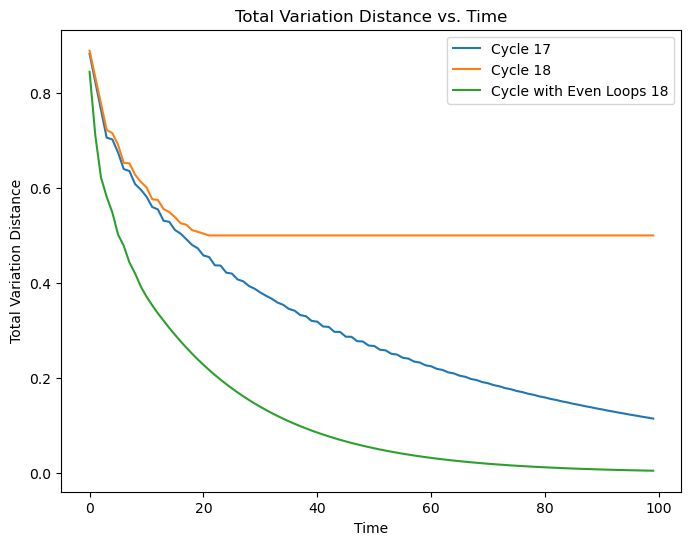

In [8]:
plot_mixing_time([cycle(17), cycle(18), cycle_with_even_loops(18)], labels=['Cycle 17', 'Cycle 18', 'Cycle with Even Loops 18'])

In [27]:
import pandas as pd

def eigvals_table(Ps, names):
    data = []
    for name, P in zip(names, Ps):
        eigvals, _ = np.linalg.eig(P.T)
        eigvals_sorted = np.sort(eigvals)[::-1]
        data.append({
            'Name': name,
            '2nd Largest Eigenvalue': eigvals_sorted[1],
            '2nd Smallest Eigenvalue': eigvals_sorted[-2],
            'Smallest Eigenvalue': eigvals_sorted[-1]
        })

    df = pd.DataFrame(data)
    return df

In [28]:
eigvals_table([cycle(17), cycle(18), cycle_with_even_loops(18)], ['Cycle 17', 'Cycle 18', 'Cycle with Even Loops 18'])

,Name,2nd Largest Eigenvalue,2nd Smallest Eigenvalue,Smallest Eigenvalue
0,Cycle 17,0.932472,-0.982973,-0.982973
1,Cycle 18,0.939693,-0.939693,-1.000000
2,Cycle with Even Loops 18,0.951816,-0.618483,-0.666667


### 1(d)
The second largest and smallest eigenvalues of the transition probability matrix $P$, are closely related to the second smallest and largest eigenvalue of the Laplacian $L = D-A$ of the graph that $P$ is a random walk on. Recall from spectral graph theory that a big largest eigenvalue means the graph can be separated, meaning there exists a good coloring that puts neighbors far apart. On the other hand, smaller second smallest eigenvalue means the graph is more connected. As we can see from the graph, the cycle with 17 has a much longer mixing time than the cycle with 18 vertices and self loops. Recall that the power iteration method converges significantly faster when the second largest eigenvalue has a huge gap from the largest. We can see above that the 18 + self-loops has a large gap, while the 17 cycle has a very small gap. Since the power method converges sigificantly faster with a large gap, it would seem likely that the mixing time would be much smaller when this happens. This is what we observe above.

### 1(e)
From the above, we want a 3 regular graph that is extremely well connected. This is precisely the definition of an expander graph. I couldn't find a good expander graph, so I just sampled 100 random graphs and then picked the one with the largest spectral gap.

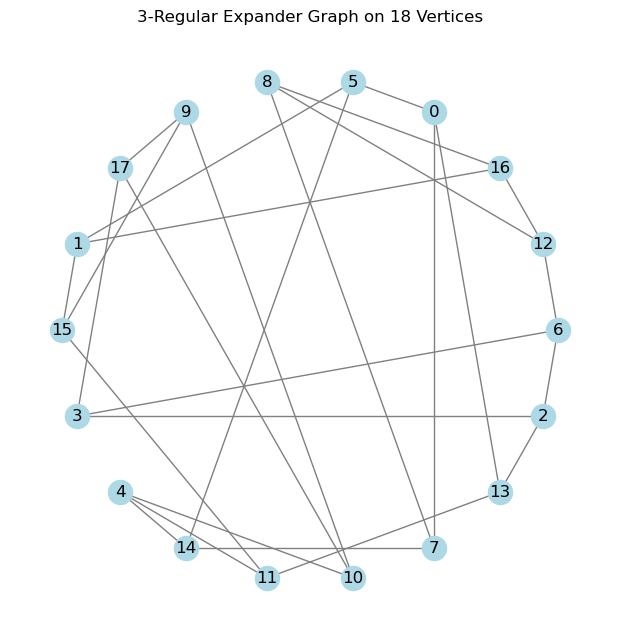

Adjacency Matrix:
 [[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]
Eigenvalues:
 [-2.7266969  -2.04164338 -1.87366804 -1.84388586 -1.64256091 -1.33707137
 -1.08883433 -0.69306463 -0.42081201 -0.10665604  0.31215213  0.93396768
  1.24199383  1.557634    1.97693283  2.31441464  2.43779833  3.        ]
Selected Graph's Second-Largest Eigenvalue (

In [45]:
import networkx as nx

def generate_3_regular_expander(n=18, trials=100):
    """Generates a 3-regular graph with the largest spectral gap using the Laplacian matrix."""
    best_graph = None
    best_spectral_gap = -float('inf')

    for _ in range(trials):
        G = nx.random_regular_graph(3, n)
        L = nx.laplacian_matrix(G).todense()
        eigenvalues = np.linalg.eigvals(L)
        eigenvalues = np.sort(eigenvalues)[::-1]
        spectral_gap = eigenvalues[0] - eigenvalues[1]

        if spectral_gap > best_spectral_gap:
            best_spectral_gap = spectral_gap
            best_graph = G

    return best_graph

# Generate the best-matching 3-regular expander
G = generate_3_regular_expander()

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw_circular(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("3-Regular Expander Graph on 18 Vertices")
plt.show()

# Compute adjacency matrix
A = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:\n", A)

# Compute eigenvalues
eigenvalues = np.linalg.eigvals(A)
eigenvalues.sort()
print("Eigenvalues:\n", eigenvalues)

# Check second-largest eigenvalue
lambda2 = sorted(eigenvalues, reverse=True)[1]
print(f"Selected Graph's Second-Largest Eigenvalue (λ₂): {lambda2}")

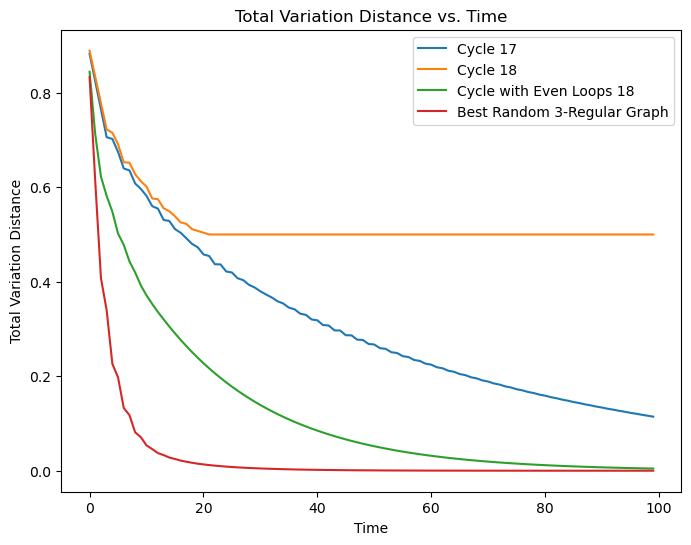

In [46]:
transition_pappus = A / np.sum(A, axis=1, keepdims=True)
plot_mixing_time([cycle(17), cycle(18), cycle_with_even_loops(18), transition_pappus], labels=['Cycle 17', 'Cycle 18', 'Cycle with Even Loops 18', 'Best Random 3-Regular Graph'])

# Problem 2
### 2(a)
There are $30!$ states in our markov chain, the number of permutations on 30 parks. Our Markov Chain is irreducible, since given any other tour, we can do ``bubble sort'' to get to it, with each swap being a transition with positive probability. So indeed, as $n \to \infty$, we will see every state a.s. (since our markov chain is finite, there is at least one recurrent state, so by irreducibility, all states are recurrent. So in fact we will see every state infinitely often).

In [60]:
import pandas as pd

df = pd.read_csv('parks.csv')
parks = {row['Name']: (row['Longitude'], row['Latitude']) for _, row in df.iterrows()}
parks

{'Acadia': (-68.21, 44.35),
 'Arches': (-109.57, 38.68),
 'Badlands': (-102.5, 43.75),
 'Big Bend': (-103.25, 29.25),
 'Black Canyon of the Gunnison': (-107.72, 38.57),
 'Bryce Canyon': (-112.18, 37.57),
 'Canyonlands': (-109.93, 38.2),
 'Crater Lake': (-122.1, 42.94),
 'Cuyahoga Valley': (-81.55, 41.24),
 'Everglades': (-80.93, 25.32),
 'Glacier': (-114.0, 48.8),
 'Grand Canyon': (-112.14, 36.06),
 'Grand Teton': (-110.8, 43.73),
 'Great Sand Dunes': (-105.51, 37.73),
 'Great Smoky Mountains': (-83.53, 35.68),
 'Hot Springs': (-93.05, 34.51),
 'Isle Royale': (-88.55, 48.1),
 'Joshua Tree': (-115.9, 33.79),
 'Lassen Volcanic': (-121.51, 40.49),
 'Mesa Verde': (-108.49, 37.18),
 'Mount Rainier': (-121.75, 46.85),
 'North Cascades': (-121.2, 48.7),
 'Olympic': (-123.5, 47.97),
 'Pinnacles': (-121.16, 36.48),
 'Rocky Mountain': (-105.58, 40.4),
 'Sequoia': (-118.68, 36.43),
 'Voyageurs': (-92.88, 48.5),
 'Yellowstone': (-110.5, 44.6),
 'Yosemite': (-119.5, 37.83),
 'Zion': (-113.05, 37.3)

In [63]:
def distance(p1, p2):
    """Computes (long1 - long2)^2 + (lat1 - lat2)^2 for two park names."""
    if p1 not in parks or p2 not in parks:
        raise ValueError("One or both park names not found in dataset")

    long1, lat1 = parks[p1]
    long2, lat2 = parks[p2]

    return np.sqrt((long1 - long2) ** 2 + (lat1 - lat2) ** 2)

In [64]:
distance('Acadia', 'Arches')

41.74683820362927

In [66]:
walk_alphabetical = 0
for i in range(len(parks.keys())):
    walk_alphabetical += distance(list(parks.keys())[i], list(parks.keys())[(i+1)%len(parks.keys())])
print(walk_alphabetical)

491.91817144615453


In [82]:
def MCMC(num_iter, T):
    best_overall = None
    best_overall_len = float('inf')
    scores = []
    current = np.random.permutation(list(parks.keys()))
    for i in range(num_iter):
        pair = np.random.choice(len(current)) # pair: (pair, (pair+1)%len(current))
        new = current.copy()
        new[pair], new[(pair+1)%len(current)] = new[(pair+1)%len(current)], new[pair]
        if length(new) < length(current):
            current = new
        elif T > 0 and np.random.rand() < np.exp(-(length(new) - length(current))/T):
            current = new
        scores.append(length(current))
        if length(current) < best_overall_len:
            best_overall = current
            best_overall_len = length(current)
    return best_overall, scores

def length(tour):
    return sum([distance(tour[i], tour[(i+1)%len(tour)]) for i in range(len(tour))])

100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


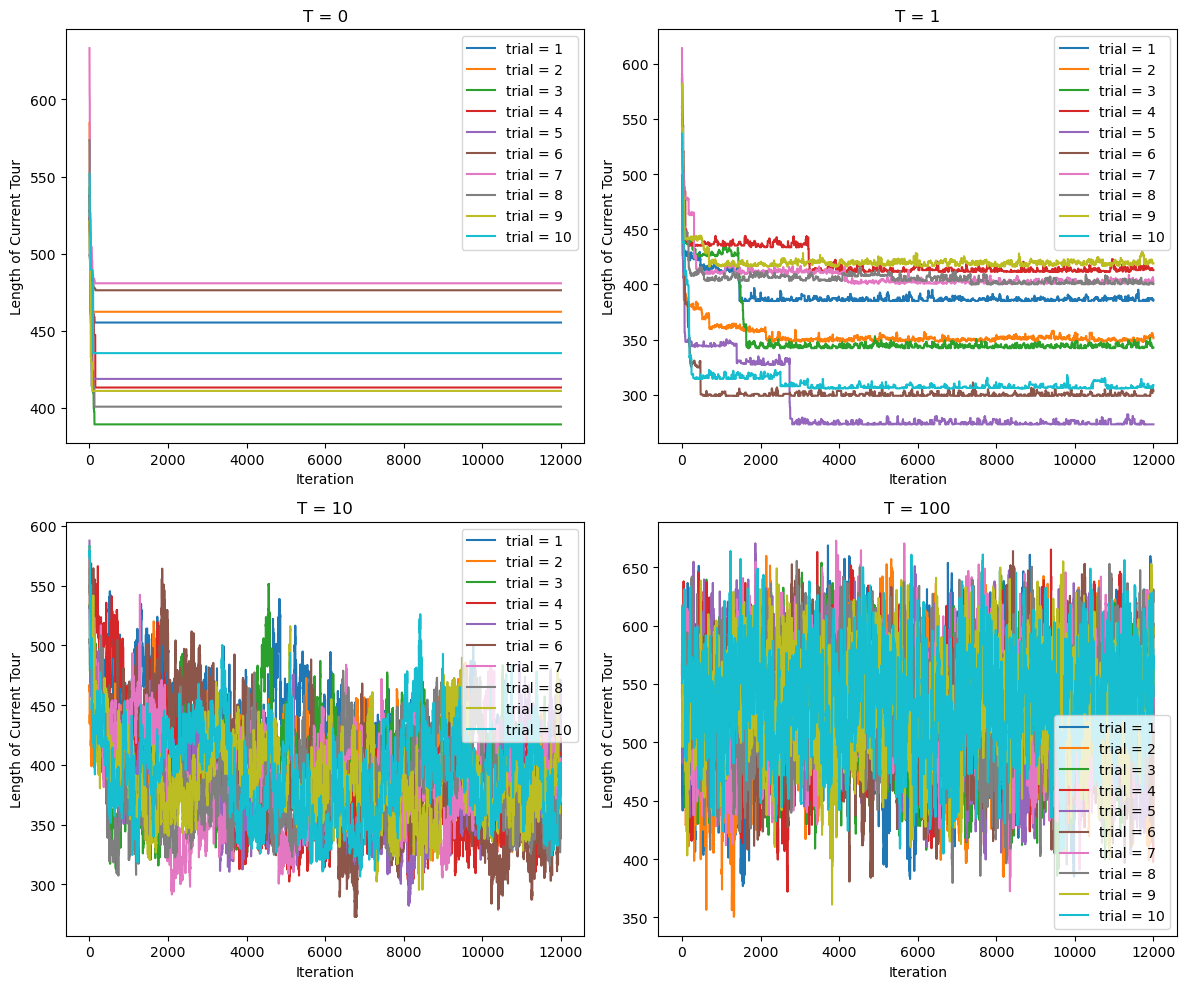

In [88]:
from tqdm import tqdm

Ts = [0, 1, 10, 100]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, T in enumerate(Ts):
    ax = axes[idx]
    for i in tqdm(range(10)):
        best_overall, scores = MCMC(12000, T)
        ax.plot(scores, label=f"trial = {i+1}")

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Length of Current Tour')
    ax.set_title(f'T = {T}')
    ax.legend()

plt.tight_layout()
plt.show()

The best value of $T$ here seems to be 1.

In [84]:
def MCMC_modified(num_iter, T):
    best_overall = None
    best_overall_len = float('inf')
    scores = []
    current = np.random.permutation(list(parks.keys()))
    for i in range(num_iter):
        pair1, pair2 = np.random.choice(len(current), 2, replace=False)
        new = current.copy()
        new[pair1], new[pair2] = new[pair2], new[pair1]
        if length(new) < length(current):
            current = new
        elif T > 0 and np.random.rand() < np.exp(-(length(new) - length(current))/T):
            current = new
        scores.append(length(current))
        if length(current) < best_overall_len:
            best_overall = current
            best_overall_len = length(current)
    return best_overall, scores

100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


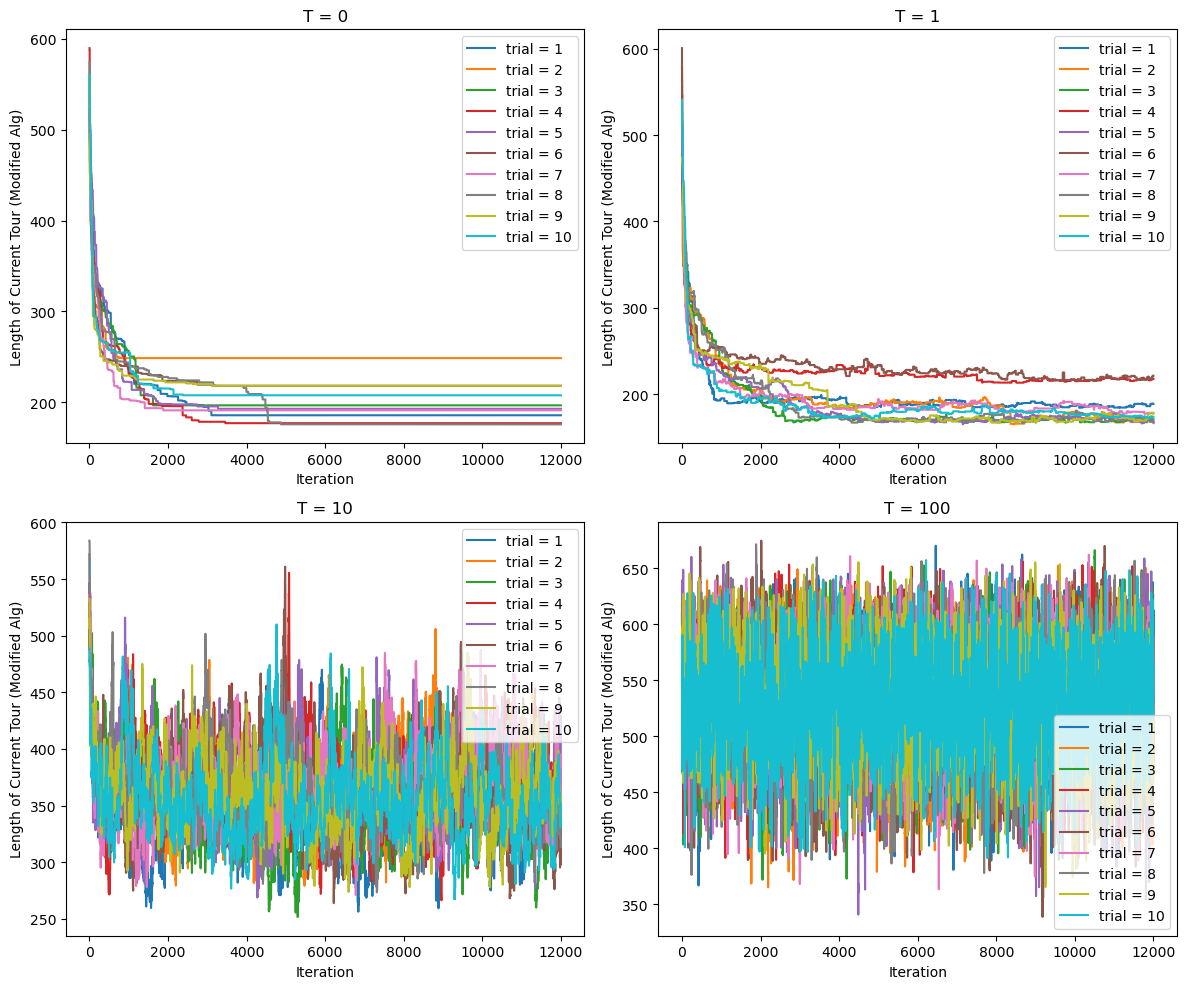

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, T in enumerate(Ts):
    ax = axes[idx]
    for i in tqdm(range(10)):
        best_overall, scores = MCMC_modified(12000, T)
        ax.plot(scores, label=f"trial = {i+1}")

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Length of Current Tour (Modified Alg)')
    ax.set_title(f'T = {T}')
    ax.legend()

plt.tight_layout()
plt.show()

The best value of $T$ here seems to also be 1. Kind of shocking how bad $T=10,100$ are. Here, for $T=0,1$, the algorithm seems to take longer to converge, like 4000-6000 rather than 2000-4000. However, this modified algorithm also gets significantly better final values, down like 100-200 for both $T=0,1$. The spread on the iterations is significantly smaller for the modified algorithm than the original. From an anecdotal perspective, for the first algorithm, every vertex has degree $N$, so a local minimum is easier to achieve since you only have to be less than $N$ others. On the other hand, the modified has degree $N \choose 2$, so getting stuck in a local min is much harder. The problem also seems to be really sensitive to how good the initial guess is, with the last values being in the same order as the first values. For mixing times, it intuitively makes sense (to me) that graphs with higher degrees would take longer. This is why I believe the second one takes longer. However, from the first problem, we know that tightly connected graphs will converge to the stationary distribution faster than the cycle graphs. So, compared to an equivalent cycle graph with the same degree, the modified algorithm would converge much faster. But because the degrees are different it's not exactly comparable.

### 1(e)
The difference between simulated annealing and this procedure is that the former decreases the temperature over time. As we saw, high temperature $T \geq 10$ is really bad over a long stretch of time. However, initally it will let the algorithm explore a lot more. We saw that the initial value is symbolic of the ending value. So the hope is that we can find a good initial value through a high temperature, then keep lowering it down so we can make the algorithm more stable. As we saw near the end, there isn't really a point in having high temperature as it just leads to microfluctuations. I would suspect simulated annealing to work much better, and in fact I believe this is how people do in RL (with initial high $\varepsilon$ and then it goes down) and with attention, and etc. It is just a good idea to shrink the exploration parameter over time.